In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


In [3]:
import os

# Directory containing the CSV files
folder_path = 'Back_EMF_Data'

# Dictionary to store DataFrames
dataframes = {}

# Loop through all files in the directory
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Read the CSV file and skip the header row
        file_path = os.path.join(folder_path, filename)
        df_name = os.path.splitext(filename)[0]
        df = pd.read_csv(file_path, skiprows=1, header=None)
        times = pd.to_numeric(df[0], errors='coerce')
        times = times + abs(times[0])
        voltages = pd.to_numeric(df[1], errors='coerce')
        # Store the lists in the dictionary
        dataframes[df_name] = {'times': list(times), 'voltages': list(voltages)}

for experiment in dataframes:
    print(f"{experiment} has {len(dataframes[experiment]['times'])} data points")


M1_Blue has 131056 data points
M1_Red has 131056 data points
M1_Yellow has 131057 data points
M2_Blue has 131056 data points
M2_Red has 131056 data points
M2_Yellow has 131056 data points


In [4]:
def nice_plot_please(x, y, title, x_label, y_label):
    plt.figure(figsize=(5, 3))
    plt.plot(x, y,label="Voltage")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show(block=False)

def nice_plot_please_two(x1, y1, x2, y2, title, x_label, y_label,data_name1,data_name2):
    plt.figure(figsize=(5, 3))
    plt.plot(x1, y1,label=data_name1)
    plt.plot(x2, y2,label=data_name2)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show(block=False)

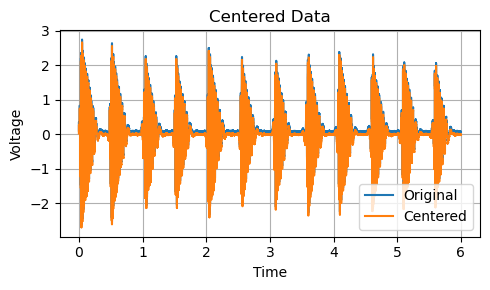

In [5]:
#dictionary of experiments, indexes as [value][0], 0 is time, 1 is voltage
example='M1_Blue'

#centering data about 0
centered_data = {}
for experiment in dataframes:
    mean = np.mean(dataframes[experiment]['voltages'])
    dataframes[df_name] = {'times': list(times), 'voltages': list(voltages)}
    centered_data[experiment]= {'times': dataframes[experiment]['times'], 'voltages' : [v - mean for v in dataframes[experiment]['voltages']]}

#dictionary of experiments, indexes as [value][0], 0 is time, 1 is voltage
nice_plot_please_two(dataframes[example]['times'],dataframes[example]['voltages'],centered_data[example]['times'],centered_data[example]['voltages'],"Centered Data","Time","Voltage","Original","Centered")


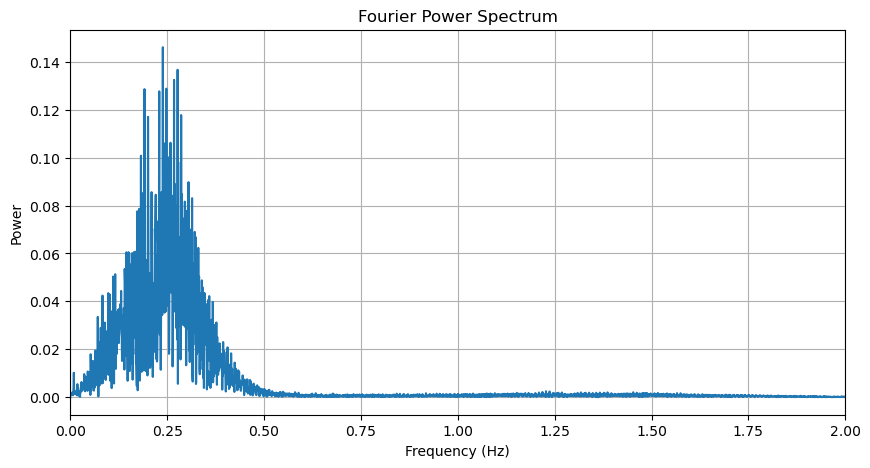

In [10]:
# Extract times and voltages from the example
times = np.array(centered_data[example]['times'])
voltages = np.array(centered_data[example]['voltages'])

# Compute the Fourier Transform of the voltages
N = len(voltages)
T = (times[99] - times[0]/100)  # Sample spacing

yf = fft(voltages)
xf = fftfreq(N, T)[:N//2]

# Compute the power spectrum
power = 2.0/N * np.abs(yf[:N//2])

# Plot the power spectrum
plt.figure(figsize=(10, 5))
plt.plot(xf, power)
plt.xlim(0, 2)
plt.title('Fourier Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.grid(True)
plt.show()
